In [3]:
library(tidyverse)
library(reshape) #melt
library(ggplot2)

In [4]:
lowerTriangle <- function(m){
  return(m[lower.tri(m,diag = FALSE)])
}

# robustness

In [5]:
robustness = read.csv('Robustness/output_data/robustness_loadings_data.csv',row.names=1)
robustness = robustness[,seq(1,5)]
colnames(robustness) = c('Formality','Activeness','Valence','Exchange','Equality')

robustness$'num' = seq(158,5)
robustness$'num' = factor(robustness$'num',levels = seq(5,158))

,num,variable,value
,<int>,<fct>,<dbl>
1,158,Formality,0.9999950
2,157,Formality,0.9999560
3,156,Formality,0.9999321
4,155,Formality,0.9998512
5,154,Formality,0.9997287
6,153,Formality,0.9997569


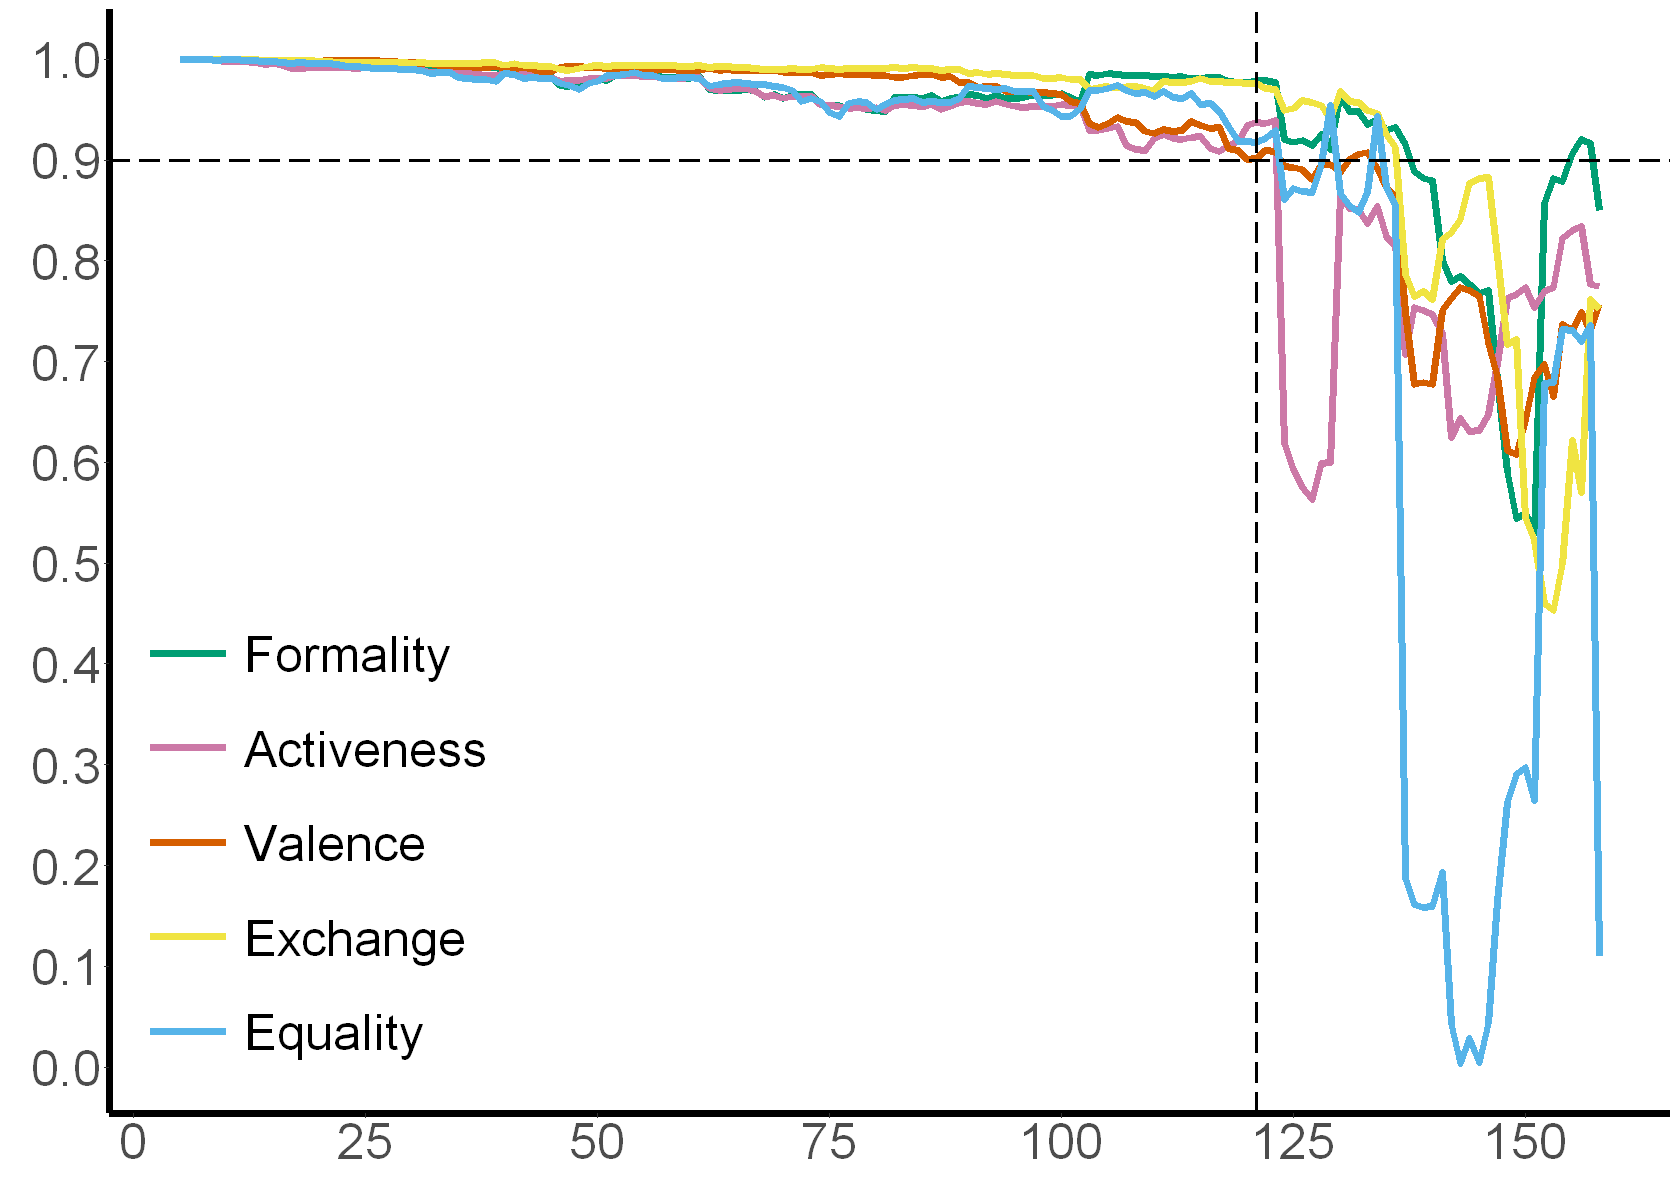

In [6]:
robustness = read.csv('Robustness/output_data/robustness_loadings_data.csv',row.names=1)
robustness = robustness[,seq(1,5)]
colnames(robustness) = c('Formality','Activeness','Valence','Exchange','Equality')

robustness$'num' = seq(158,5)

df <- melt(robustness,  id.vars = 'num')
head(df)

options(repr.plot.width=14, repr.plot.height=10)
ggplot(df, aes(x=rev(num),y=value)) + 
geom_line(aes(colour = variable),size=2) +
scale_color_manual(values=c('Formality'='#009E73','Activeness'='#CC79A7',
                            'Valence'='#D55E00','Exchange'='#F0E442','Equality'='#56B4E9'))+
scale_x_continuous(name = '',breaks = seq(0,158,25))+
scale_y_continuous(name = '',breaks = seq(0,1,0.1))+
geom_hline(aes(yintercept=0.9),linetype=5,size=1)+
#geom_hline(aes(yintercept=0.95),linetype=5,size=1)+
geom_vline(aes(xintercept=160-40+1),linetype=5,size=1)+
#geom_vline(aes(xintercept=160-65+1),linetype=5,size=1)+
theme_classic()+
theme(axis.line = element_line(linetype=1,color="black",size=2),
      axis.text = element_text(size=30),
      legend.key.size = unit(2,'cm'),legend.title = element_blank(),
      legend.text = element_text(size = 30),
      legend.position=c(0.13,0.25))

In [16]:
png("output_graph/robustness.png", bg="transparent",
    family = 'sans',units='in',width=14,height=10,res=300)
ggplot(df, aes(x=rev(num),y=value)) + 
geom_line(aes(colour = variable),size=2) +
scale_color_manual(values=c('Formality'='#009E73','Activeness'='#CC79A7',
                            'Valence'='#D55E00','Exchange'='#F0E442','Equality'='#56B4E9'))+
scale_x_continuous(name = '',breaks = seq(0,160,20))+
scale_y_continuous(name = '',breaks = seq(0,1,0.1))+
geom_hline(aes(yintercept=0.9),linetype=5,size=1)+
#geom_hline(aes(yintercept=0.95),linetype=5,size=1)+
geom_vline(aes(xintercept=160-40+1),linetype=5,size=1)+
#geom_vline(aes(xintercept=160-65+1),linetype=5,size=1)+
theme_classic()+
theme(axis.line = element_line(linetype=1,color="black",size=2),
      axis.text = element_blank(),
      legend.key.size = unit(2,'cm'),legend.title = element_blank(),
      legend.text = element_text(size = 30),
      legend.position='none')
dev.off()

png 
  2

In [11]:
robustness%>%filter_all(all_vars(. > 0.90)) %>% tail()

,Formality,Activeness,Valence,Exchange,Equality,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
114,0.9784370,0.9141696,0.9113245,0.9774446,0.9336212,45
115,0.9773193,0.9189170,0.9099138,0.9775053,0.9185760,44
116,0.9769604,0.9347467,0.9009987,0.9755481,0.9187565,43
117,0.9789213,0.9369509,0.9016012,0.9764124,0.9176818,42
118,0.9794742,0.9364548,0.9099582,0.9707531,0.9214079,41
119,0.9773307,0.9396250,0.9084040,0.9702211,0.9294254,40


In [8]:
robustness%>%filter_all(all_vars(. > 0.95)) %>% tail()

,Formality,Activeness,Valence,Exchange,Equality,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
86,0.9612008,0.9550513,0.9679491,0.9845610,0.9711486,69
87,0.9615041,0.9531109,0.9684603,0.9837727,0.9677851,68
88,0.9624478,0.9523914,0.9677960,0.9838073,0.9681508,67
89,0.9639345,0.9532081,0.9673952,0.9839776,0.9679651,66
90,0.9642444,0.9536748,0.9671588,0.9812661,0.9534688,65
91,0.9580035,0.9528314,0.9562919,0.9804529,0.9515958,61


# regression

## correlation of models rdm

In [12]:
full_subfull = data.frame(full=integer(154))
for (num in seq(5,158)){
    fullset_regions_rdm = read.csv('../RSA_Regression/output_data/models_rdm/full_feature/raw33d_dissim_dist.csv',
                              row.names=1)
    fullset_array = lowerTriangle(fullset_regions_rdm)

    subset_path = paste(paste(paste('output_data/regression/models_rdm/full_feature/',num,sep=''),
                '/',sep=''),'raw33d_dissim_dist.csv',sep='')
    subset_regions_rdm = read.csv(subset_path,row.names=1)
    if (sum(rownames(fullset_regions_rdm) == rownames(subset_regions_rdm))==19){
        subset_array = lowerTriangle(subset_regions_rdm)
        corr_value = cor(fullset_array,subset_array,method='spearman')
        full_subfull[num-5+1,] = corr_value
        }
    else{full_subfull[num-5+1,] = 999}
}

In [13]:
dim_subfull = data.frame(dim=integer(154))
for (num in seq(5,158)){
    fullset_regions_rdm = read.csv('../RSA_Regression/output_data/models_rdm/dimensional/favee_dissim_dist.csv',
                              row.names=1)
    fullset_array = lowerTriangle(fullset_regions_rdm)

    subset_path = paste(paste(paste('output_data/regression/models_rdm/dimensional/',num,sep=''),
                '/',sep=''),'favee_dissim_dist.csv',sep='')
    subset_regions_rdm = read.csv(subset_path,row.names=1)
    if (sum(rownames(fullset_regions_rdm) == rownames(subset_regions_rdm))==19){
        subset_array = lowerTriangle(subset_regions_rdm)
        corr_value = cor(fullset_array,subset_array,method='spearman')
        dim_subfull[num-5+1,] = corr_value
        }
    else{dim_subfull[num-5+1,] = 999}
}

In [14]:
cat_subfull = data.frame(cat=integer(154))
for (num in seq(5,158)){
    fullset_regions_rdm = read.csv('../RSA_Regression/output_data/models_rdm/categorical/hpp_dissim_dist.csv',
                              row.names=1)
    fullset_array = lowerTriangle(fullset_regions_rdm)

    subset_path = paste(paste(paste('output_data/regression/models_rdm/categorical/',num,sep=''),
                '/',sep=''),'hpp_dissim_dist.csv',sep='')
    subset_regions_rdm = read.csv(subset_path,row.names=1,check.names=FALSE)
    subset_regions_rdm = subset_regions_rdm[rownames(fullset_regions_rdm),
                                            rownames(fullset_regions_rdm)]
    if (sum(rownames(fullset_regions_rdm) == rownames(subset_regions_rdm))==19){
        subset_array = lowerTriangle(subset_regions_rdm)
        corr_value = cor(fullset_array,subset_array,method='spearman')
        cat_subfull[num-5+1,] = corr_value
        }
    else{cat_subfull[num-5+1,] = 999}
}

,num,variable,value
,<int>,<fct>,<dbl>
1,5,full,0.2847763
2,6,full,0.4275303
3,7,full,0.5508858
4,8,full,0.6507010
5,9,full,0.6609155
6,10,full,0.6852585


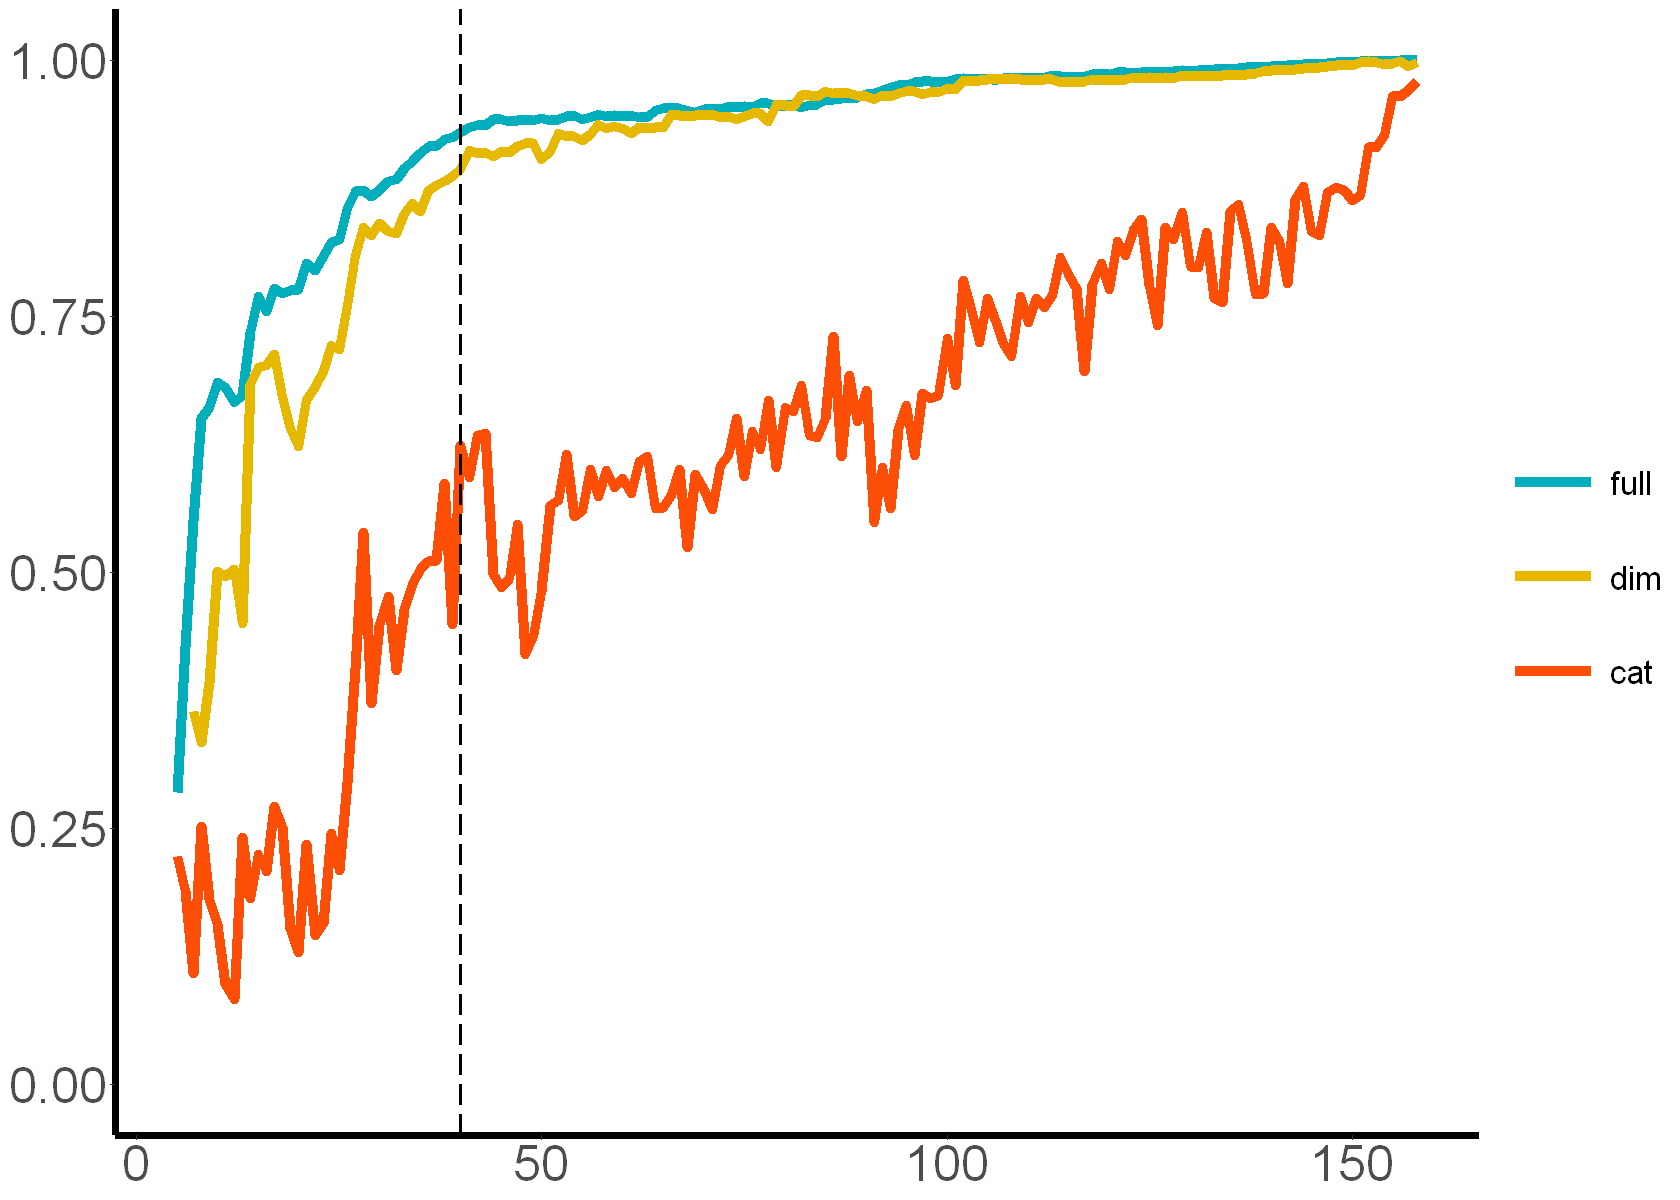

In [15]:
options(repr.plot.width=14, repr.plot.height=10)
subfull = cbind(full_subfull,dim_subfull,cat_subfull)
subfull$'num' = seq(5,158)
df <- melt(subfull,  id.vars = 'num')
head(df)

ggplot(df, aes(x=num,y=value)) + 
geom_line(aes(colour = variable),size=3) +
scale_colour_manual(values=c('full'='#00AFBB','dim'='#E7B800','cat'='#FC4E07'))+
#scale_x_continuous(name = '',breaks = seq(25,160,10))+
#scale_y_continuous(name = '',breaks = seq(0.4,1,0.1))+
ylim(0,1)+
#geom_hline(aes(yintercept=0.9),linetype=5,size=1)+
#geom_vline(aes(xintercept=65),linetype=5,size=1)+
geom_vline(aes(xintercept=40),linetype=5,size=1)+
theme_classic()+
theme(axis.line = element_line(linetype=1,color="black",size=2),
      axis.text = element_text(size=30),
      axis.title = element_blank(),
      legend.key.size = unit(2,'cm'),legend.title = element_blank(),
      legend.text = element_text(size = 20))

In [17]:
png("output_graph/correlation_of_models_rdm.png", bg="transparent",
    family = 'sans',units='in',width=14,height=10,res=300)
ggplot(df, aes(x=num,y=value)) + 
geom_line(aes(colour = variable),size=3) +
scale_colour_manual(values=c('full'='#00AFBB','dim'='#E7B800','cat'='#FC4E07'))+
#scale_x_continuous(name = '',breaks = seq(25,160,10))+
ylim(0,1)+
#geom_vline(aes(xintercept=65),linetype=5,size=1)+
geom_vline(aes(xintercept=40),linetype=5,size=1)+
theme_classic()+
theme(axis.line = element_line(linetype=1,color="black",size=2),
      axis.text = element_blank(),
      axis.title = element_blank(),
      legend.position='none')
dev.off()

png 
  2

## p value

In [18]:
-log(0.05)
-log(0.01)
-log(0.001)

[1] 2.995732

[1] 4.60517

[1] 6.907755

In [19]:
raw_pvalue = data.frame(full_modern=integer(154),full_religion=integer(154))
for (num in seq(5,158)){
    path = paste('output_data/regression/p_value/full_feature/',num,sep='')
    path = paste(path,'.csv',sep='')
    p_values = read.csv(path,row.names=1)
    p_values_focus = p_values[,c('modern','religion_per')] 
    raw_pvalue[num-5+1,] = p_values_focus
}

favee_pvalue = data.frame(dimension_modern=integer(154),dimension_religion=integer(154))
for (num in seq(5,158)){
    path = paste('output_data/regression/p_value/dimensional/',num,sep='')
    path = paste(path,'.csv',sep='')
    p_values = read.csv(path,row.names=1)
    p_values_focus = p_values[,c('modern','religion_per')] 
    favee_pvalue[num-5+1,] = p_values_focus
}

hpp_pvalue = data.frame(category_modern=integer(154),category_religion=integer(154))
for (num in seq(5,158)){
    path = paste('output_data/regression/p_value/categorical/',num,sep='')
    path = paste(path,'.csv',sep='')
    p_values = read.csv(path,row.names=1)
    p_values_focus = p_values[,c('modern','religion_per')] 
    hpp_pvalue[num-5+1,] = p_values_focus
}

In [20]:
raw_pvalue_log = -log(raw_pvalue)
favee_pvalue_log = -log(favee_pvalue)
hpp_pvalue_log = -log(hpp_pvalue)

pvalue_log = cbind(raw_pvalue_log,favee_pvalue_log,hpp_pvalue_log)

In [21]:
pvalue_log$'num' = seq(5,158)
#pvalue_log = pvalue_log %>% filter(num >= 40&num <= 65)

df <- melt(pvalue_log, id.vars = 'num') %>% mutate(model=case_when(
            variable=='full_modern'~'full',variable=='full_religion'~'full',
            variable=='dimension_modern'~'dimension',variable=='dimension_religion'~'dimension',
            variable=='category_modern'~'category',variable=='category_religion'~'category')) %>% 
            
            mutate(predictor=case_when(
            variable=='full_modern'~'modern',variable=='full_religion'~'religion',
            variable=='dimension_modern'~'modern',variable=='dimension_religion'~'religion',
            variable=='category_modern'~'modern',variable=='category_religion'~'religion'))

df$'model' = factor(df$'model',levels=c('full','dimension','category'))
head(df)

,num,variable,value,model,predictor
,<int>,<fct>,<dbl>,<fct>,<chr>
1,5,full_modern,1.4836867,full,modern
2,6,full_modern,0.8636983,full,modern
3,7,full_modern,1.2157081,full,modern
4,8,full_modern,2.4889147,full,modern
5,9,full_modern,2.7757939,full,modern
6,10,full_modern,3.3354096,full,modern


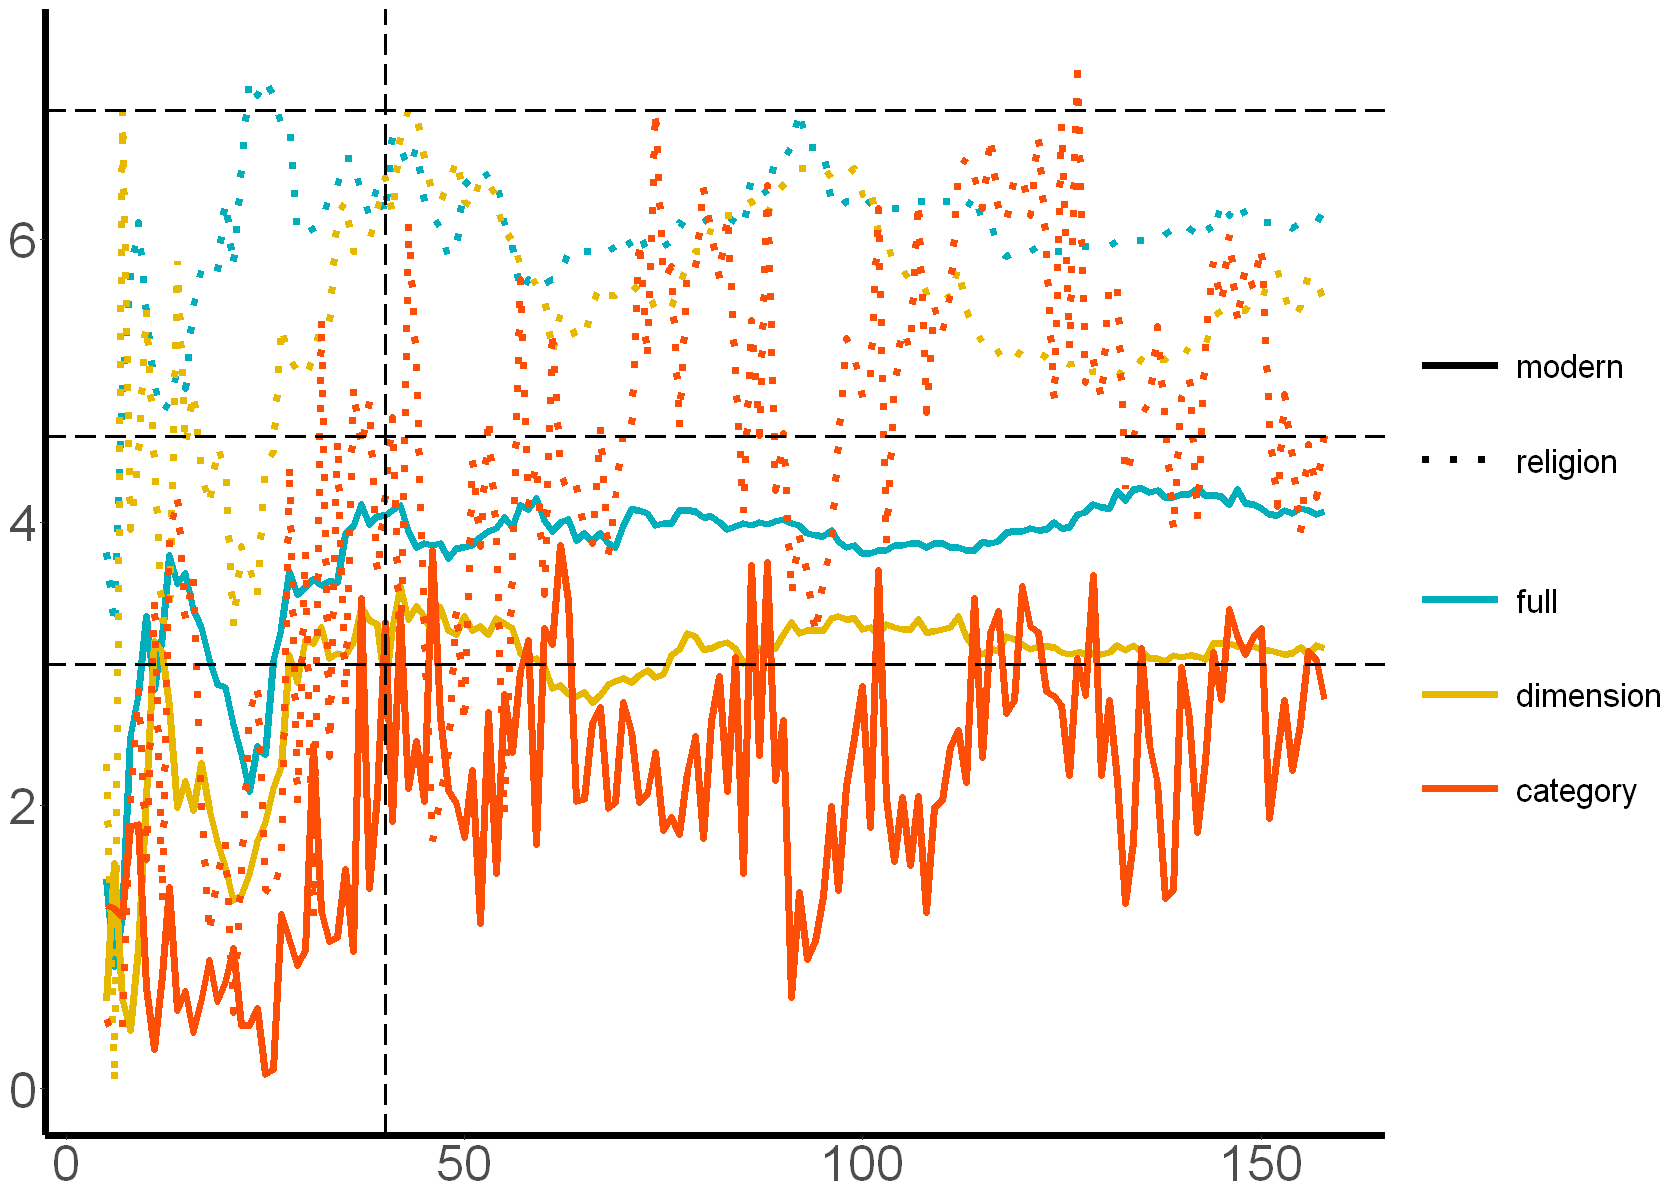

In [22]:
options(repr.plot.width=14, repr.plot.height=10)
ggplot(df, aes(x=num,y=value)) + 
geom_line(aes(colour = model,linetype=predictor),size=2) +
scale_colour_manual(values=c('full'='#00AFBB','dimension'='#E7B800','category'='#FC4E07'))+
scale_linetype_manual(values=c('modern'='solid','religion'='dotted'))+
geom_hline(aes(yintercept=-log(0.05)),linetype=5,size=1)+
geom_hline(aes(yintercept=-log(0.01)),linetype=5,size=1)+
geom_hline(aes(yintercept=-log(0.001)),linetype=5,size=1)+
geom_vline(aes(xintercept=40),linetype=5,size=1)+
theme_classic()+
theme(axis.line = element_line(linetype=1,color="black",size=2),
      axis.text = element_text(size=30),
      axis.title = element_blank(),
      legend.key.size = unit(2,'cm'),legend.title = element_blank(),
      legend.text = element_text(size = 20))

In [23]:
png("output_graph/p_valu.png", bg="transparent",
    family = 'sans',units='in',width=14,height=10,res=300)
ggplot(df, aes(x=num,y=value)) + 
geom_line(aes(colour = model,linetype=predictor),size=2) +
scale_colour_manual(values=c('full'='#00AFBB','dimension'='#E7B800','category'='#FC4E07'))+
scale_linetype_manual(values=c('modern'='solid','religion'='dotted'))+
geom_hline(aes(yintercept=-log(0.05)),linetype=5,size=1)+
geom_hline(aes(yintercept=-log(0.01)),linetype=5,size=1)+
geom_hline(aes(yintercept=-log(0.001)),linetype=5,size=1)+
geom_vline(aes(xintercept=40),linetype=5,size=1)+
theme_classic()+
theme(axis.line = element_line(linetype=1,color="black",size=2),
      axis.text = element_blank(),
      axis.title = element_blank(),
      legend.position='none')
dev.off()

png 
  2

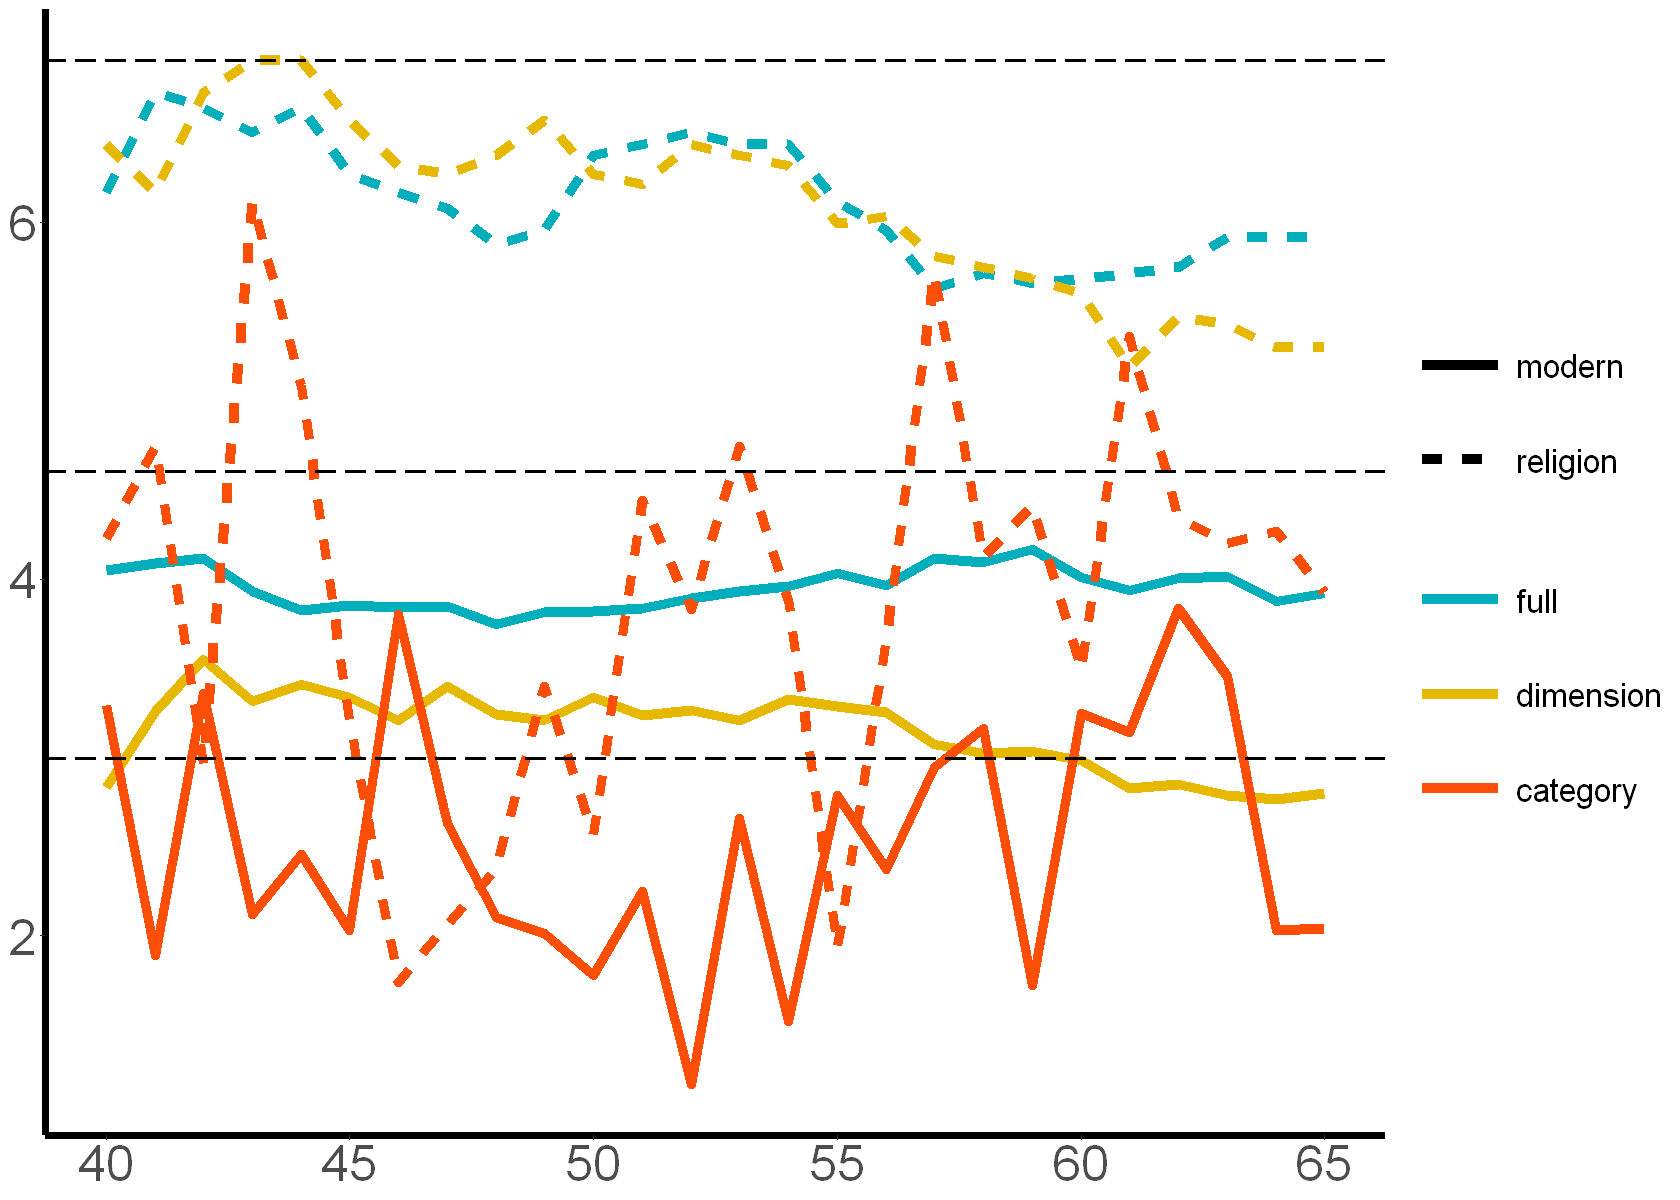

In [24]:
raw_pvalue_log = -log(raw_pvalue)
favee_pvalue_log = -log(favee_pvalue)
hpp_pvalue_log = -log(hpp_pvalue)

pvalue_log = cbind(raw_pvalue_log,favee_pvalue_log,hpp_pvalue_log)

pvalue_log$'num' = seq(5,158)
pvalue_log = pvalue_log %>% filter(num >= 40&num <= 65)

df <- melt(pvalue_log, id.vars = 'num') %>% mutate(model=case_when(
            variable=='full_modern'~'full',variable=='full_religion'~'full',
            variable=='dimension_modern'~'dimension',variable=='dimension_religion'~'dimension',
            variable=='category_modern'~'category',variable=='category_religion'~'category')) %>% 
            
            mutate(predictor=case_when(
            variable=='full_modern'~'modern',variable=='full_religion'~'religion',
            variable=='dimension_modern'~'modern',variable=='dimension_religion'~'religion',
            variable=='category_modern'~'modern',variable=='category_religion'~'religion'))

df$'model' = factor(df$'model',levels=c('full','dimension','category'))

options(repr.plot.width=14, repr.plot.height=10)
ggplot(df, aes(x=num,y=value)) + 
geom_line(aes(colour = model,linetype=predictor),size=3) +
scale_colour_manual(values=c('full'='#00AFBB','dimension'='#E7B800','category'='#FC4E07'))+
#scale_x_continuous(name = '',breaks = seq(25,160,10))+
#scale_y_continuous(name = '',breaks = seq(0.3,1,0.1))+
geom_hline(aes(yintercept=-log(0.05)),linetype=5,size=1)+
geom_hline(aes(yintercept=-log(0.01)),linetype=5,size=1)+
geom_hline(aes(yintercept=-log(0.001)),linetype=5,size=1)+
#geom_vline(aes(xintercept=76),linetype=5,size=1)+
#geom_vline(aes(xintercept=40),linetype=5,size=1)+
theme_classic()+
theme(axis.line = element_line(linetype=1,color="black",size=2),
      axis.text = element_text(size=30),
      axis.title = element_blank(),
      legend.key.size = unit(2,'cm'),legend.title = element_blank(),
      legend.text = element_text(size = 20))

# each region's model

In [25]:
regions = c('Australia','Brazil','Chile','CHN','Egypt','France','Germany',
           'HK','India','Israel','Japan','Mexico','Portugal','Qatar','Russia',
           'South_africa','Spain','UK','USA')

## favee

In [26]:
favee_sim = data.frame(matrix(NA,154,19))
colnames(favee_sim) = regions

for (num in seq(5,158)){    
    file_path = 'output_data/dimensional_model/relationship_var_score/'
    file_path = paste(paste(file_path,num,sep=''),'/',sep='')
    file_region = dir(file_path)
    for (file in file_region){
        region = strsplit(file,'.csv')[[1]]
        sub_favee = read.csv(paste(file_path,file,sep=''),row.names=1)
        subset = rownames(sub_favee)
        
        full_path = '../DataCleanPCA/output_data/pca_results/'
        full_path = paste(paste(full_path,region,sep=''),'/',sep='')
        full_path = paste(full_path,region,sep='')
        full_path = paste(full_path,'_scores_var_5c_33d.csv',sep='')
        full_favee = read.csv(full_path,row.names=1)
        full_favee = full_favee[subset,]# abstract subset from the full set

        sub_array = c(dist(sub_favee,method = 'euclidean'))
        full_array = c(dist(full_favee,method = 'euclidean'))
        cor_value = cor(sub_array,full_array,method='spearman')

        favee_sim[num-5+1,region] = cor_value
    }
}

In [27]:
favee_sim_num = favee_sim
favee_sim_num$'num' = seq(5,158)
write.csv(favee_sim_num,'output_data/favee_sim_num.csv')

## hpp

In [28]:
lowerTriangle <- function(m){
  return(m[lower.tri(m,diag = FALSE)])
}

In [29]:
hpp_sim = data.frame(matrix(NA,154,19))
colnames(hpp_sim) = regions
for (num in seq(5,158)){    
    file_path = 'output_data/categorical_rdm/'
    file_path = paste(paste(file_path,num,sep=''),'/',sep='')
    file_region = dir(file_path)
    for (file in file_region){
        sub_hpp = read.csv(paste(file_path,file,sep=''),row.names=1)
        subset = rownames(sub_hpp)

        region = strsplit(file,'_raw_3k.csv')[[1]]
        full_path = '../Clustering/output_data/categorical_model/each_region/rdm_results/33d/'
        full_path = paste(full_path,region,sep='')
        full_path = paste(full_path,'_raw_3k.csv',sep='')
        full_hpp = read.csv(full_path,row.names=1,check.names=FALSE)
        full_hpp = full_hpp[subset,subset]

        sub_array = lowerTriangle(sub_hpp)
        full_array = lowerTriangle(full_hpp)
        cor_value = cor(sub_array,full_array,method='spearman')

        hpp_sim[num-5+1,region] = cor_value
    }
}

In [31]:
hpp_sim_num = hpp_sim
hpp_sim_num$'num' = seq(5,158)
write.csv(hpp_sim_num,'output_data/hpp_sim_num.csv')

## plot

In [32]:
library(reshape)
library(ggplot2)

### distribution

In [33]:
favee_sim_num = read.csv('output_data/favee_sim_num.csv',row.names=1)
regions = colnames(favee_sim_num)%>%str_replace('South_africa','South Africa')%>%
                                    str_replace('HK','Hongkong SAR')
colnames(favee_sim_num) = regions
hpp_sim_num = read.csv('output_data/hpp_sim_num.csv',row.names=1)
colnames(hpp_sim_num) = regions

In [34]:
favee_sim_num_melt = melt(favee_sim_num,id.vars='num')
favee_sim_num_melt$'model' = 'dimensional'

hpp_sim_num_melt = melt(hpp_sim_num,id.vars='num')
hpp_sim_num_melt$'model' = 'categorical'

sim_num_melt = rbind(favee_sim_num_melt,hpp_sim_num_melt)
sim_num_melt$'model' = factor(sim_num_melt$'model',levels=c('dimensional','categorical'))
head(sim_num_melt)

,num,variable,value,model
,<int>,<fct>,<dbl>,<fct>
1,5,Australia,-0.7212121,dimensional
2,6,Australia,-0.8136253,dimensional
3,7,Australia,0.4545455,dimensional
4,8,Australia,0.5785441,dimensional
5,9,Australia,0.7374517,dimensional
6,10,Australia,0.6940711,dimensional


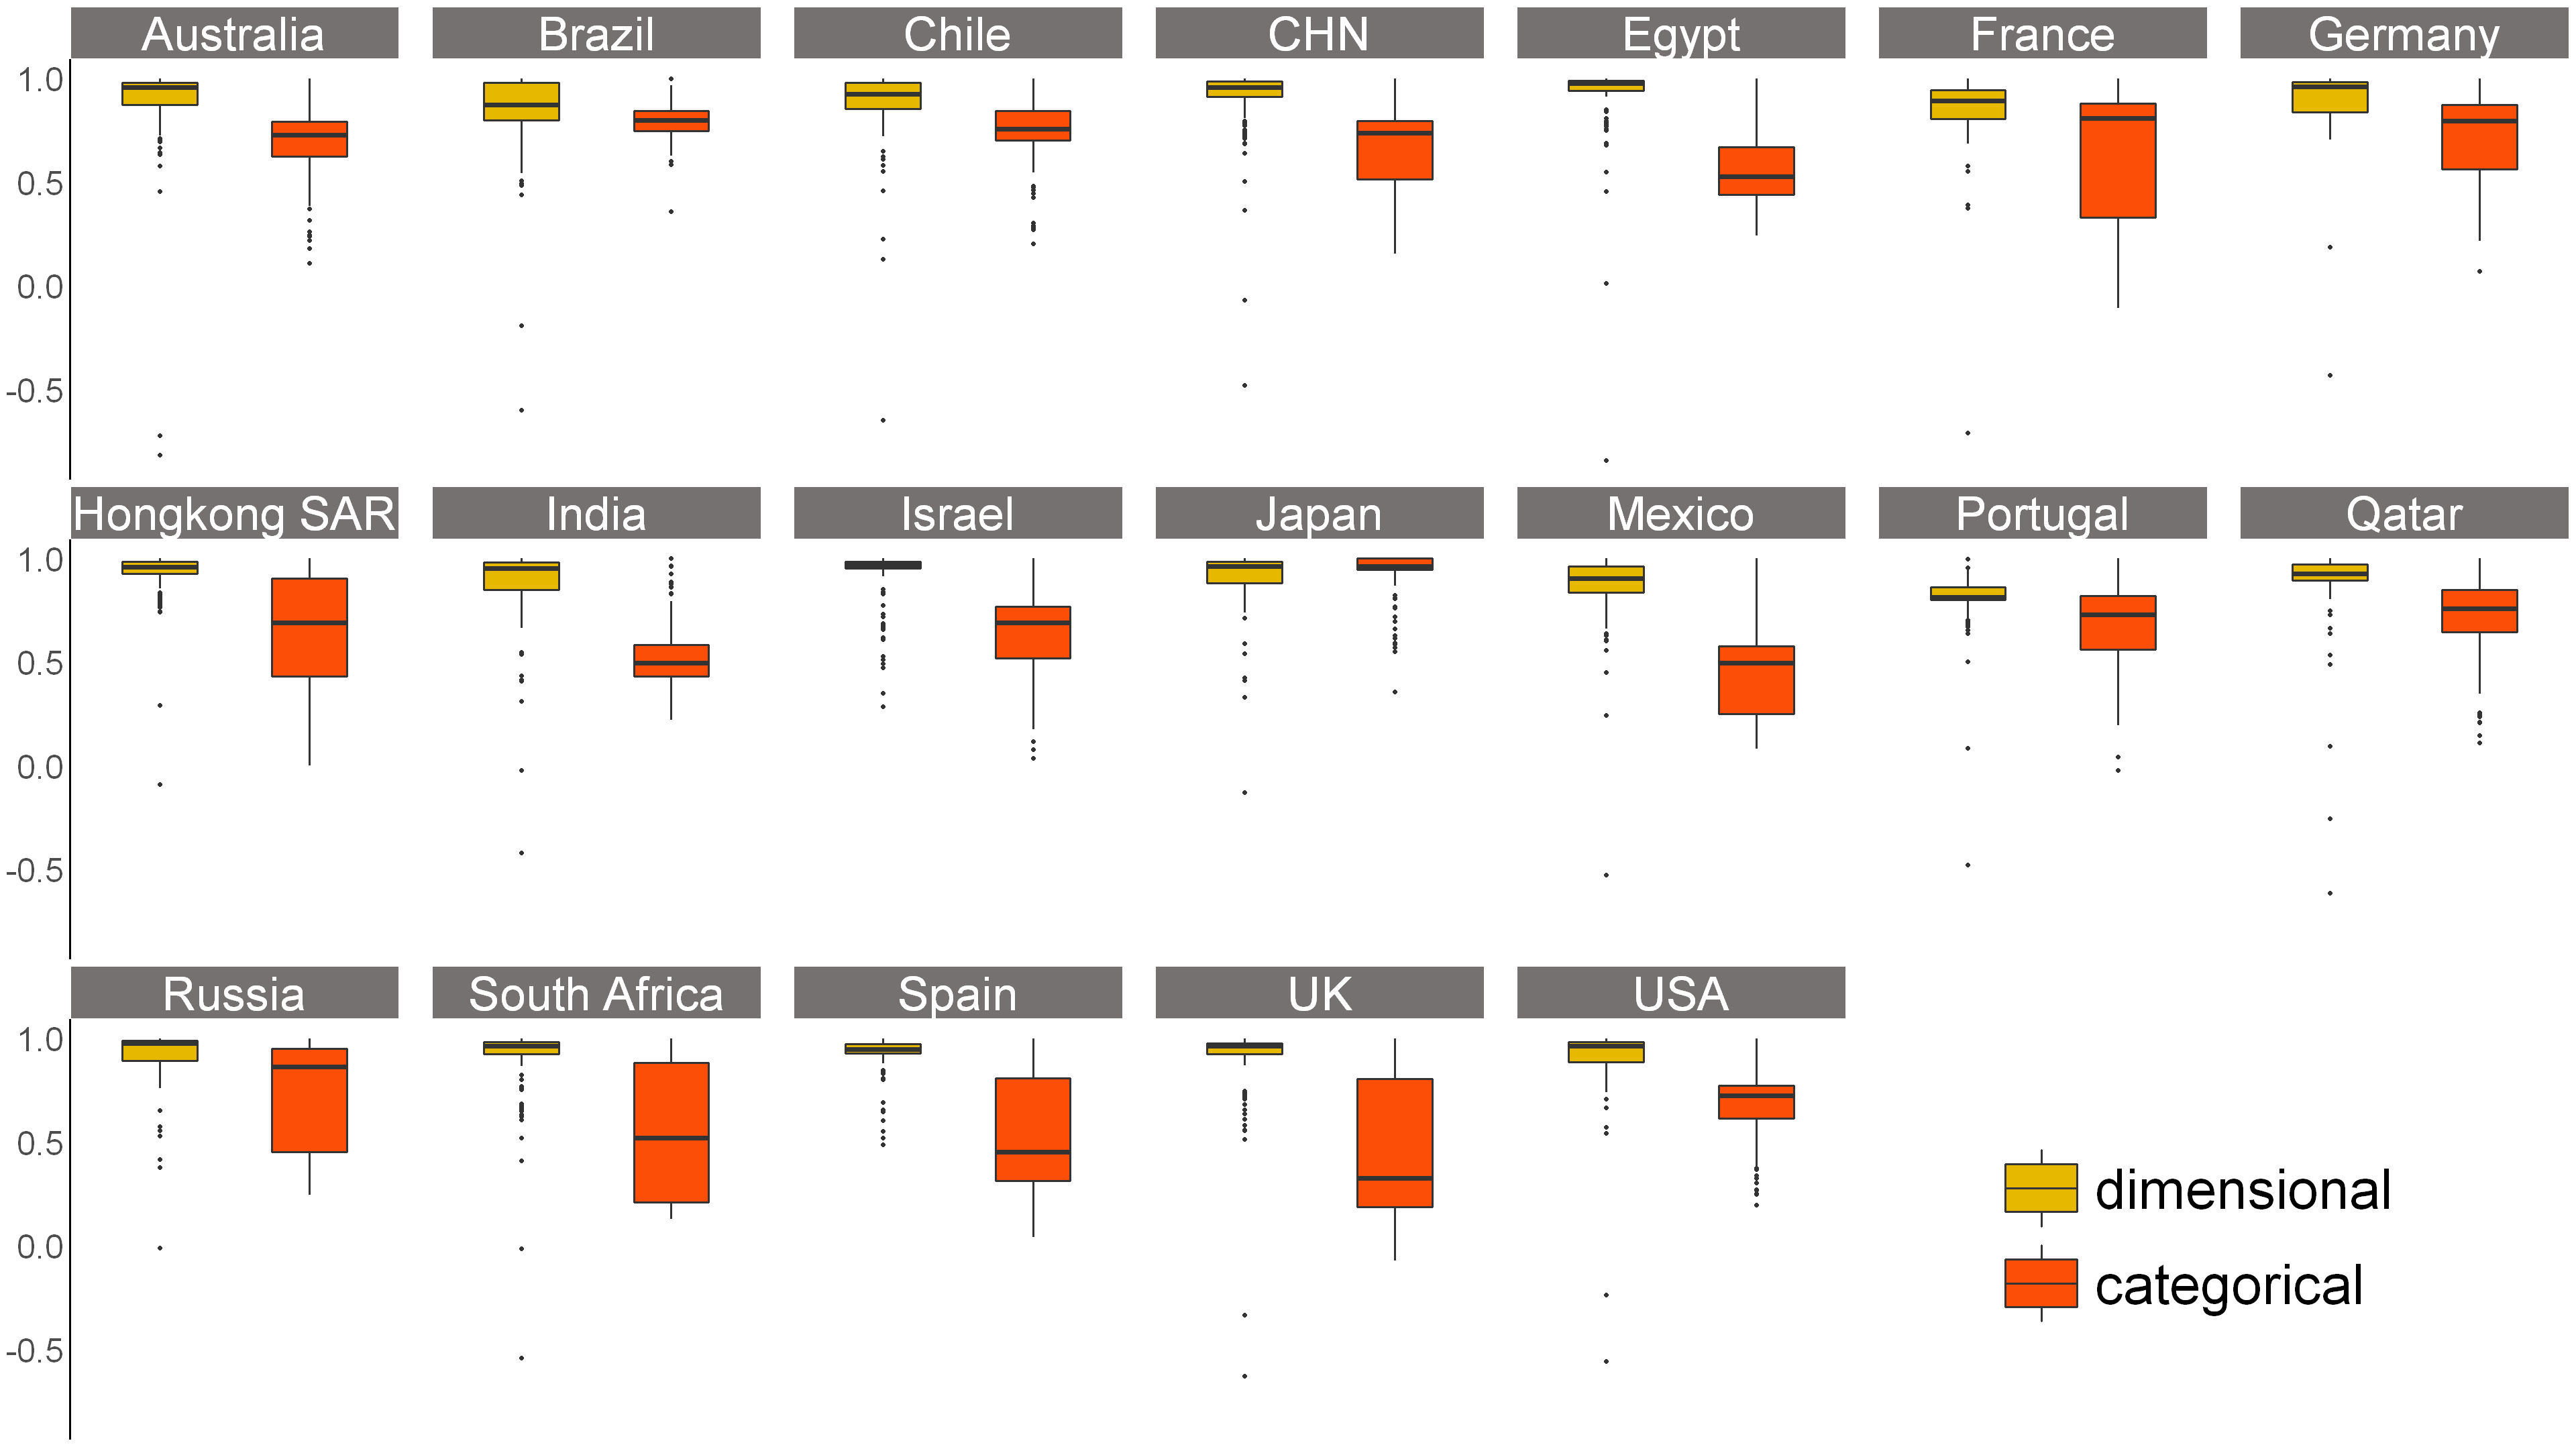

In [35]:
df = sim_num_melt
options(repr.plot.width=32,repr.plot.height=18)
ggplot(df,aes(x=model,y=value,fill=model))+
geom_boxplot(lwd=1,width = 0.5)+
scale_fill_manual(values=c('dimensional'= '#E7B800','categorical'='#FC4E07'))+
#geom_jitter(color='grey',size=0.8)+
facet_wrap(variable~.,ncol=7)+
#geom_text(aes(label=round(value,2)),position=position_stack(vjust=0.5))+

theme_classic()+
theme(legend.position=c(0.85,0.15),
      legend.title = element_blank(),
      legend.text = element_text(size = 50),
      legend.key.size = unit(3,'cm'),
      axis.text.x = element_blank(),
      axis.text.y = element_text(size=30),
      axis.ticks = element_blank(),
      axis.line.x = element_blank(),
      axis.line.y = element_line(linetype=1,color="black",size=1),
      strip.text = element_text(size=42,colour='white'),
      axis.title = element_blank(),
      panel.spacing.x = unit(1, "cm"),
      strip.background = element_rect(color='white',fill='#767171'))

In [36]:
png("../output_graph/each_region_models.png", bg="transparent",
    family = 'sans',units='in',width=32,height=18,res=300)
ggplot(df,aes(x=model,y=value,fill=model))+
geom_boxplot(lwd=1,width = 0.5)+
scale_fill_manual(values=c('dimensional'= '#E7B800','categorical'='#FC4E07'))+
#geom_jitter(color='grey',size=0.8)+
facet_wrap(variable~.,ncol=7)+
#geom_text(aes(label=round(value,2)),position=position_stack(vjust=0.5))+

theme_classic()+
theme(legend.position='none',
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      axis.line.x = element_blank(),
      axis.line.y = element_line(linetype=1,color="black",size=1),
      strip.text = element_text(size=42,colour='#767171'),
      axis.title = element_blank(),
      panel.spacing.x = unit(1, "cm"),
      strip.background = element_rect(color='white',fill='#767171'))
dev.off()

png 
  2

### subset is 40

In [37]:
favee_sim_num = read.csv('output_data/favee_sim_num.csv',row.names=1)
regions = colnames(favee_sim_num)%>%str_replace('South_africa','South Africa')%>%
                                    str_replace('HK','Hongkong SAR')
colnames(favee_sim_num) = regions
hpp_sim_num = read.csv('output_data/hpp_sim_num.csv',row.names=1)
colnames(hpp_sim_num) = regions

# abstract subset is 40
favee_subset40 = favee_sim_num %>% filter(num == 40)
favee_subset40 = favee_subset40[,-c(20)]

hpp_subset40 = hpp_sim_num %>% filter(num == 40)
hpp_subset40 = hpp_subset40[,-c(20)]

subset40 = rbind(favee_subset40,hpp_subset40)
subset40$'model' = c('Dimensional','Categorical')
subset40

Australia,Brazil,Chile,CHN,Egypt,France,Germany,Hongkong SAR,India,Israel,Japan,Mexico,Portugal,Qatar,Russia,South Africa,Spain,UK,USA,model
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.8908820,0.8152573,0.8392481,0.8297021,0.9406922,0.7970401,0.8349871,0.9202122,0.8242239,0.9459852,0.8565507,0.8372950,0.8606039,0.8980545,0.8909909,0.9178241,0.9328736,0.9192139,0.9029204,Dimensional
0.4882522,0.7265383,0.7192022,0.4873837,0.5438877,0.3345815,0.6070588,0.6914349,0.4996048,0.5501249,1.0000000,0.1507367,0.3307564,0.6316986,0.3317015,0.1812029,0.2338503,0.1832028,0.6960719,Categorical


In [38]:
subset40_t = t(subset40)
colnames(subset40_t) = subset40_t[20,]
subset40_t = data.frame(subset40_t[-c(20),])
subset40_t$'Categorical' = as.numeric(subset40_t$'Categorical')
subset40_t$'Dimensional' = as.numeric(subset40_t$'Dimensional')
subset40_t = subset40_t %>% arrange(subset40_t$'Categorical')
regions_order = rownames(subset40_t)

In [39]:
subset40_melt = melt(subset40,id.vars='model')
subset40_melt$'value' = as.numeric(subset40_melt$'value')
subset40_melt$'model' = factor(subset40_melt$'model',
                               levels=c('Dimensional','Categorical'))
subset40_melt$'variable' = factor(subset40_melt$'variable',levels=rev(regions_order))
head(subset40_melt)

,model,variable,value
,<fct>,<fct>,<dbl>
1,Dimensional,Australia,0.8908820
2,Categorical,Australia,0.4882522
3,Dimensional,Brazil,0.8152573
4,Categorical,Brazil,0.7265383
5,Dimensional,Chile,0.8392481
6,Categorical,Chile,0.7192022


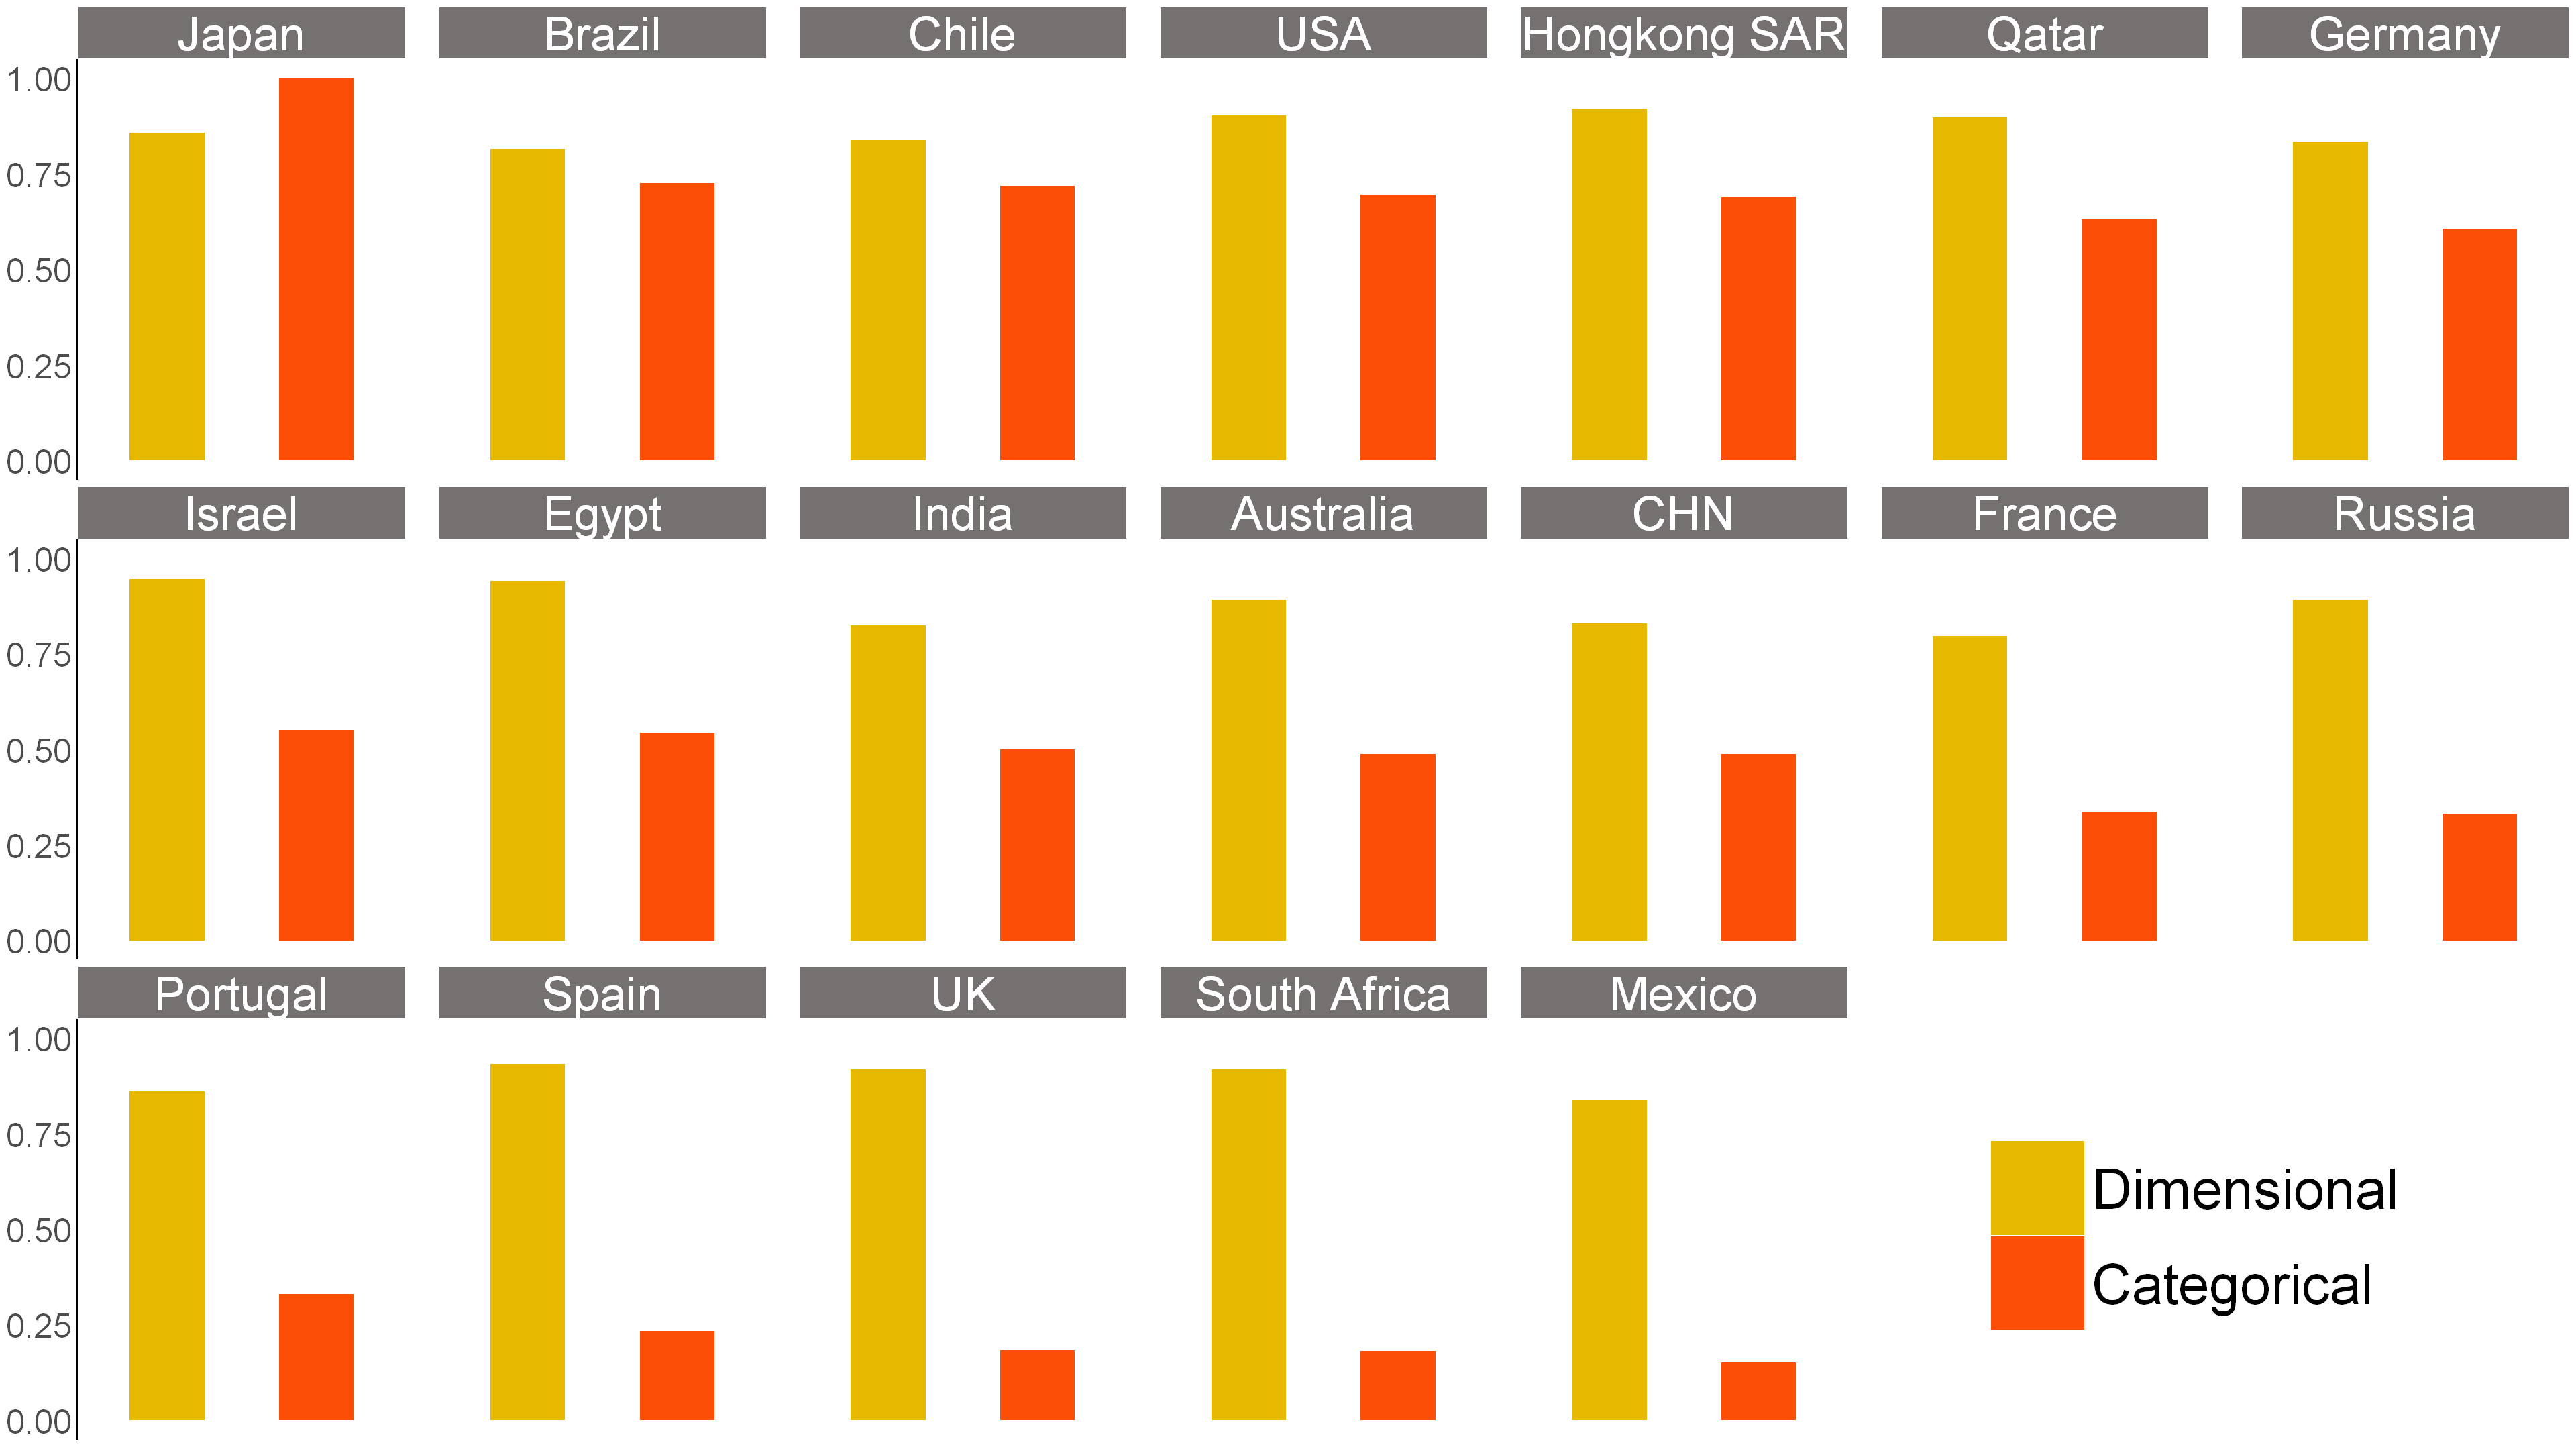

In [40]:
df = subset40_melt
options(repr.plot.width=32,repr.plot.height=18)
ggplot(df,aes(x=model,y=value,fill=model))+
geom_bar(stat = "identity",width = 0.5)+
scale_fill_manual(values=c('Dimensional'= '#E7B800','Categorical'='#FC4E07'))+
#geom_jitter(color='grey',size=0.8)+
facet_wrap(variable~.,ncol=7)+
#geom_text(aes(label=round(value,2)),position=position_stack(vjust=0.5))+

theme_classic()+
theme(legend.position=c(0.85,0.15),
      legend.title = element_blank(),
      legend.text = element_text(size = 50),
      legend.key.size = unit(3,'cm'),
      axis.text.x = element_blank(),
      axis.text.y = element_text(size=30),
      axis.ticks = element_blank(),
      axis.line.x = element_blank(),
      axis.line.y = element_line(linetype=1,color="black",size=1),
      strip.text = element_text(size=42,colour='white'),
      axis.title = element_blank(),
      panel.spacing.x = unit(1, "cm"),
      strip.background = element_rect(color='white',fill='#767171'))

In [41]:
png("output_graph/each_region_models_subset40.png",
    family = 'sans',units='in',width=32,height=18,res=300)
df = subset40_melt
options(repr.plot.width=32,repr.plot.height=18)
ggplot(df,aes(x=model,y=value,fill=model))+
geom_bar(stat = "identity",width = 0.5)+
scale_fill_manual(values=c('Dimensional'= '#E7B800','Categorical'='#FC4E07'))+
#geom_jitter(color='grey',size=0.8)+
facet_wrap(variable~.,ncol=7)+
#geom_text(aes(label=round(value,2)),position=position_stack(vjust=0.5))+

theme_classic()+
theme(legend.position='none',
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      axis.line.x = element_blank(),
      axis.line.y = element_line(linetype=1,color="black",size=1),
      strip.text = element_text(size=42,colour='#767171'),
      axis.title = element_blank(),
      panel.spacing.x = unit(1, "cm"),
      strip.background = element_rect(color='white',fill='#767171'))
dev.off()

png 
  2

# wordcloud: 40 relationships

In [1]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image #mask
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
rels_version = pd.read_csv('../../Study2/input_data/Rel_labels/labels_different_versions.csv',
                          index_col=0)
rels_version_zipped = zip(rels_version['one'],rels_version['common'])
rels_version_map = {key:value for key, value in rels_version_zipped}

In [3]:
subset_40 = pd.read_csv('data/subset_40.csv',index_col=0)
subset_40 = subset_40.iloc[:,0].to_list()
familiar = pd.read_csv('../Study3_CHNvsUSA/output_data/familiarity/familiarity_159rels_usa_2rounds.csv',
                      index_col=0)
familiar = pd.DataFrame(familiar.mean(),columns=['familiar'])
familiar_subset = familiar.loc[subset_40,:]
familiar_subset = familiar_subset.reset_index()
familiar_subset['rel'] = familiar_subset['index'].map(rels_version_map)
familiar_subset

,index,familiar,rel
0,Wife and Husband,94.444444,Wife-Husband
1,Doctor and Patient,84.833333,Doctor-Patient
2,Student and Dorm Resident assistant,68.273810,Student-Dorm Resident assistant
3,Between a person and their social media follower,68.518987,A person and their social media follower
4,Between frenemies,69.578313,Frenemies
5,Between political allies,60.351351,Political allies
6,Between fans of the same sports team,76.000000,Fans of the same sports team
7,Landlord and Tenant,78.615385,Landlord-Tenant
8,Television host and Guest,61.881579,Television host-Guest
9,Bully and Victim,75.900000,Bully-Victim


In [4]:
rel_dict = {familiar_subset.loc[i,'rel']: familiar_subset.loc[i,'familiar'] \
            for i in range(len(familiar_subset))}

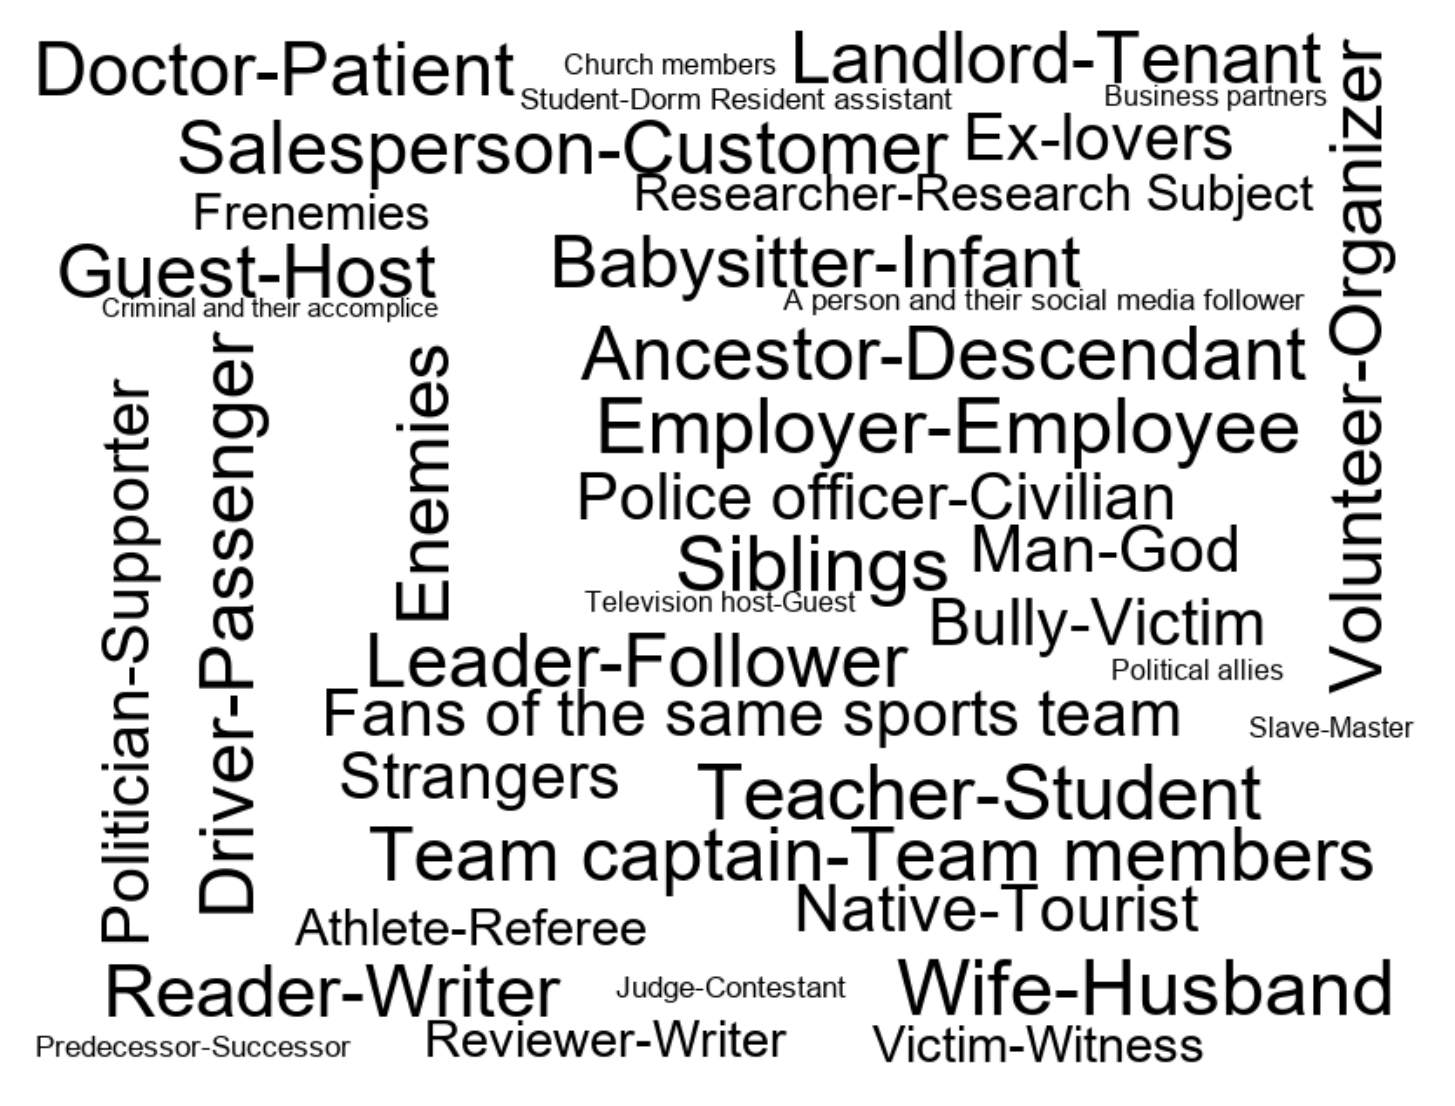

In [7]:
wc = WordCloud(background_color='white',width=800,height=600,
               mode='RGBA',color_func=lambda *args, **kwargs: "black",
               font_path='font/arial.ttf',
               min_font_size=15,max_font_size=45)
wc.generate_from_frequencies(rel_dict)

plt.figure(figsize=(6,6),dpi=300)
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()